In [65]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

import glob
import random
import datetime
import tensorflow as tf
from shutil import rmtree
from keras.models import load_model
from os.path import join, getctime, basename
from models import *
from utils import *
from data_preprocess import load_prep_data

%load_ext autoreload
%autoreload 2

aug_data = load_prep_data(time=500, debug=True, onehot=True)
x_train = aug_data['x_train']
y_train = aug_data['y_train']
x_valid = aug_data['x_valid']
y_valid = aug_data['y_valid']
x_test = aug_data['x_test']
y_test = aug_data['y_test']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Shape of x_train set: (6960, 22, 250)
Shape of y_train labels: (6960,)
Shape of x_valid set: (1500, 22, 250)
Shape of y_valid labels: (1500,)
Shape of X_test_prep set: (1772, 22, 250)
Shape of y_test_prep labels: (1772,)
Shape of y_train labels after categorical conversion: (6960, 4)
Shape of y_valid labels after categorical conversion: (1500, 4)
Shape of y_test labels after categorical conversion: (1772, 4)


In [66]:
input_shape = x_train.shape
x_train = tf.transpose( tf.expand_dims(x_train, axis=-1), perm=[0, 2, 3, 1])
x_valid = tf.transpose( tf.expand_dims(x_valid, axis=-1), perm=[0, 2, 3, 1])

print("x_train.shape: {}", format(x_train.shape))

x_train.shape: {} (6960, 250, 1, 22)


## 2 Layers CNN + LSTM

In [39]:
config = {
    # Network
    'num_inputs': x_train.shape[0],
    'input_shape': (input_shape[2],1, input_shape[1]),
    'epochs': 100,
    'dropout': 0.6,
    'batch_size': 32
}
CNN2LayerLSTM = CNN2LayerLSTM()
CNN2LayerLSTM.build_model(config)
history = CNN2LayerLSTM.train(x_train, y_train, x_valid, y_valid, config, get_workpath('CNN2LayerLSTM'))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 248, 1, 25)        1675      
                                                                 
 batch_normalization_32 (Ba  (None, 248, 1, 25)        992       
 tchNormalization)                                               
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 83, 1, 25)         0         
 ng2D)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 83, 1, 25)         0         
                                                                 
 conv2d_29 (Conv2D)          (None, 77, 1, 32)         5632      
                                                                 
 batch_normalization_33 (Ba  (None, 77, 1, 32)        

In [40]:
x_test_transposed = tf.transpose(tf.expand_dims(x_test, axis=-1), perm=[0, 2, 3, 1])
raw = CNN2LayerLSTM.evaluate(x_test_transposed, y_test)
print("Raw Acc result: {}".format(raw[1]))
replace_model_if_better('CNN2LayerLSTM', np.mean(raw[1]), CNN2LayerLSTM, config)

56/56 [==============================] - 1s 11ms/step - loss: 0.9903 - accuracy: 0.6896
Raw Acc result: 0.6896162629127502
Old model exists. Comparing performance.
New model is better than the old one. Replacing the old model with the new model.


True

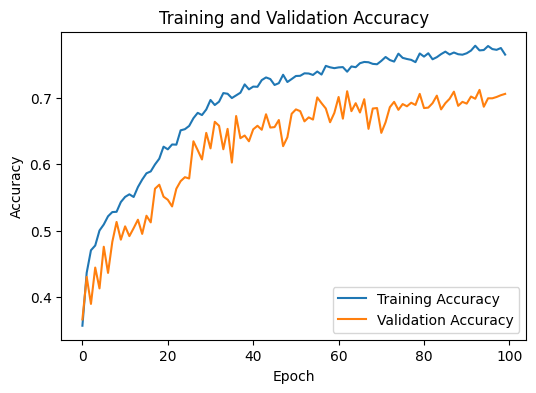

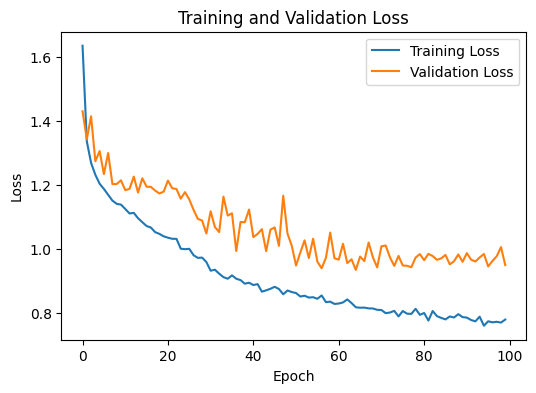

In [41]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4 Layers CNN + LSTM

In [67]:
config = {
    # Network
    'num_inputs': x_train.shape[0],
    'input_shape': (input_shape[2],1, input_shape[1]),
    'epochs': 100,
    'dropout': 0.4,
    'batch_size': 32
}
CNN4LayerLSTM = CNN4LayerLSTM()
CNN4LayerLSTM.build_model(config)
history = CNN4LayerLSTM.train(x_train, y_train, x_valid, y_valid, config, get_workpath('CNN4LayerLSTM'))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 250, 1, 25)        13775     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 84, 1, 25)         0         
 ng2D)                                                           
                                                                 
 batch_normalization_52 (Ba  (None, 84, 1, 25)         100       
 tchNormalization)                                               
                                                                 
 dropout_52 (Dropout)        (None, 84, 1, 25)         0         
                                                                 
 conv2d_48 (Conv2D)          (None, 84, 1, 50)         31300     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 28, 1, 50)       

In [68]:
x_test_transposed = tf.transpose(tf.expand_dims(x_test, axis=-1), perm=[0, 2, 3, 1])
raw = CNN4LayerLSTM.evaluate(x_test_transposed, y_test)
print("Raw Acc result: {}".format(raw[1]))
replace_model_if_better('CNN4LayerLSTM', np.mean(raw[1]), CNN4LayerLSTM, config)

56/56 [==============================] - 1s 14ms/step - loss: 0.8296 - accuracy: 0.6716
Raw Acc result: 0.6715575456619263
Old model exists. Comparing performance.
New model is worse than the old one. Will not update the old model


False

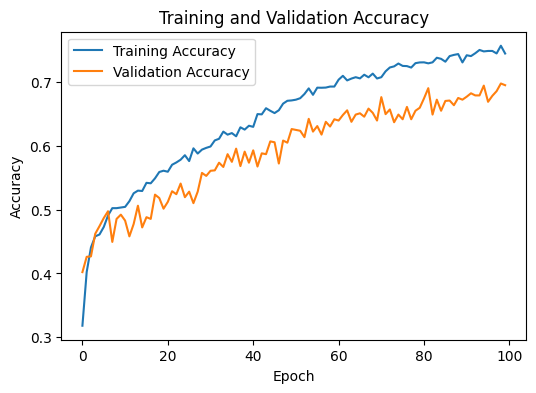

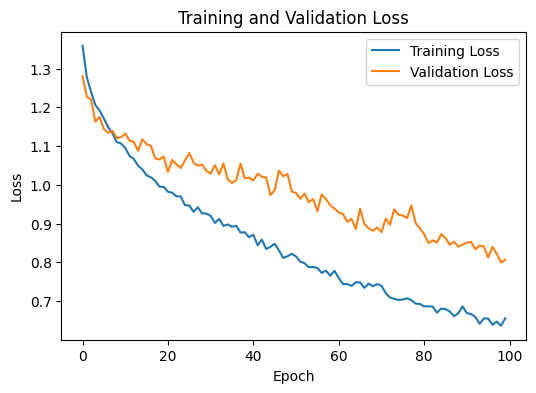

In [69]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()